Milestone 3: Exploratory Data Analysis (EDA)

Objective: Identify demand elasticity and customer segmentation.

 Deliverables:

o Detailed EDA report with visualizations.

 Evaluation:

o Insights approved before moving to feature engineering.

# Objective: Identify demand elasticity and customer segmentation.

# 1 advanced EDA

In [35]:
import pandas as pd
from tabulate import tabulate
df = pd.read_csv("C:\\Users\priya\\Downloads\\dynamic_pricing.csv")
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------+--------------------------+---------------------------+---------------+
|    |   Number_of_Riders |   Number_of_Drivers | Location_Category   | Customer_Loyalty_Status   |   Number_of_Past_Rides |   Average_Ratings | Time_of_Booking   | Vehicle_Type   |   Expected_Ride_Duration |   Historical_Cost_of_Ride |   Unnamed: 10 |
|----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------+--------------------------+---------------------------+---------------|
|  0 |                 90 |                  45 | Urban               | Silver                    |                     13 |              4.47 | Night             | Premium        |                       90 |                   284.257 |     

🔹🔹isnull

check every cell in the dataframe if it is missing ==miss(true) ,exist(false).

In [36]:
#1 advanced EDA
print(df.isnull().sum())  

Number_of_Riders              0
Number_of_Drivers             0
Location_Category             0
Customer_Loyalty_Status       0
Number_of_Past_Rides          0
Average_Ratings               0
Time_of_Booking               0
Vehicle_Type                  0
Expected_Ride_Duration        0
Historical_Cost_of_Ride       0
Unnamed: 10                1000
dtype: int64


🔹🔹shape
used to count the no of rows and columns.

In [37]:
df.shape

(1000, 11)

🔹🔹duplicated values= the same values repeated.

In [38]:
print("duplicate values",df.duplicated().sum())

duplicate values 0


🔹🔹head= used to display the first few rows and we can specifiy the no.of values we need.

info=used to understand the structure of the dataset without printing all rows like non-null values(values are not missing) and datatypesa(int,float,object).

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
 10  Unnamed: 10              0 non-null      float64
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB
None


In [40]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
Unnamed: 10                float64
dtype: object

🔹🔹🔹 describe= 

used to get statistical summary of numerical data like,count, mean, min,max, standard deviation.

--------🔗 In relation to 25% and 75%:

25% (Q1) → lower quartile (25th percentile)

50% (Median / Q2) → middle of the data (50th percentile)

75% (Q3) → upper quartile (75th percentile)

In [41]:
print(df.describe())   

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  \
count      1000.000000              1000.00000              1000.000000   
mean          4.257220                99.58800               372.502623   
std           0.435781                49.16545               187.158756   
min           3.500000                10.00000                25.993449   
25%         

#  Deliverables:

# o Detailed EDA report with visualizations.

In [42]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride', 'Unnamed: 10']
Categorical Columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


🔹🔹🔹🔹 histogram for all numeric features

-histograms are used to visualize the distribution of the data.

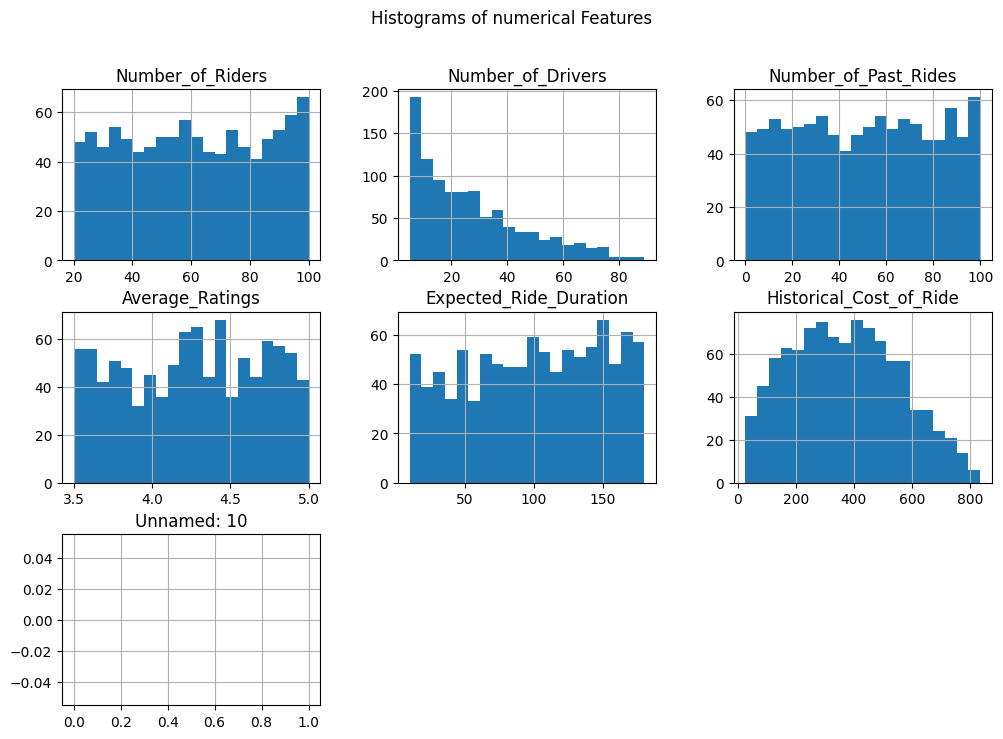

In [43]:
#histogram for all numeric features
import matplotlib.pyplot as plt
df.hist(figsize=(12,8), bins=20)

plt.suptitle("Histograms of numerical Features")
plt.show()

--output=

"The graph shows that number of drivers depends on different categories in the dataset"
-If the dataset contains different categories (e.g., different cities, times of day, types of vehicles) and the graph shows the distribution of the number of drivers across these categories.

# Countplots for categorical columns
- The code is used to create countplots for categorical columns in a dataset. The bar chart shows the count of "Location_Category" with three categories: Urban, Suburban, and Rural. The counts are approximately 340 for Urban, 280 for Suburban, and 330 for Rural. The code and chart provide insights into the distribution of the Location_Category variable, suggesting a relatively balanced distribution across the three categories.



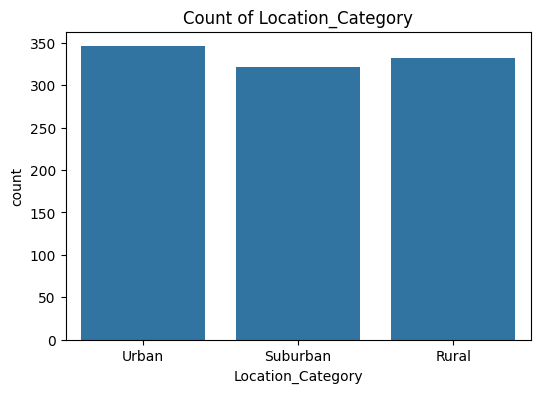

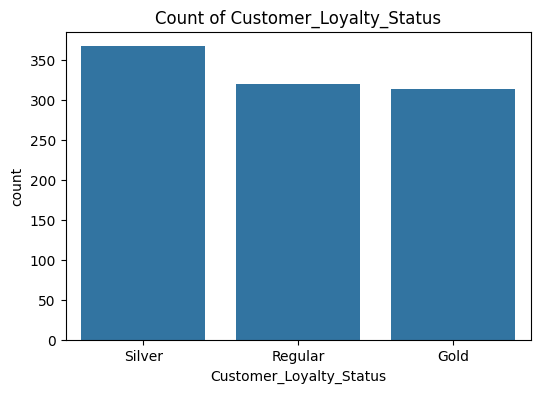

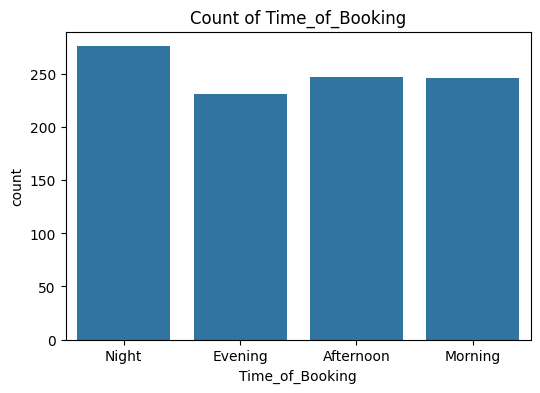

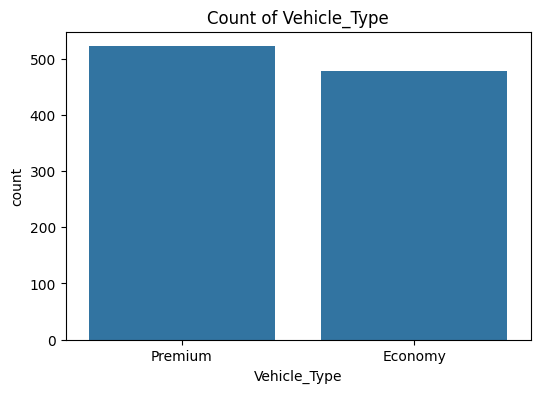

In [44]:
# Countplots for categorical columns
import seaborn as sns
categorical_cols = ["Location_Category", "Customer_Loyalty_Status", "Time_of_Booking", "Vehicle_Type"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.show()

# Pairplot 
A pairplot is a visualization tool that shows the relationships between multiple variables in a dataset.
The dots represent data points. Each dot on the graph corresponds to a single observation or row in your dataset.


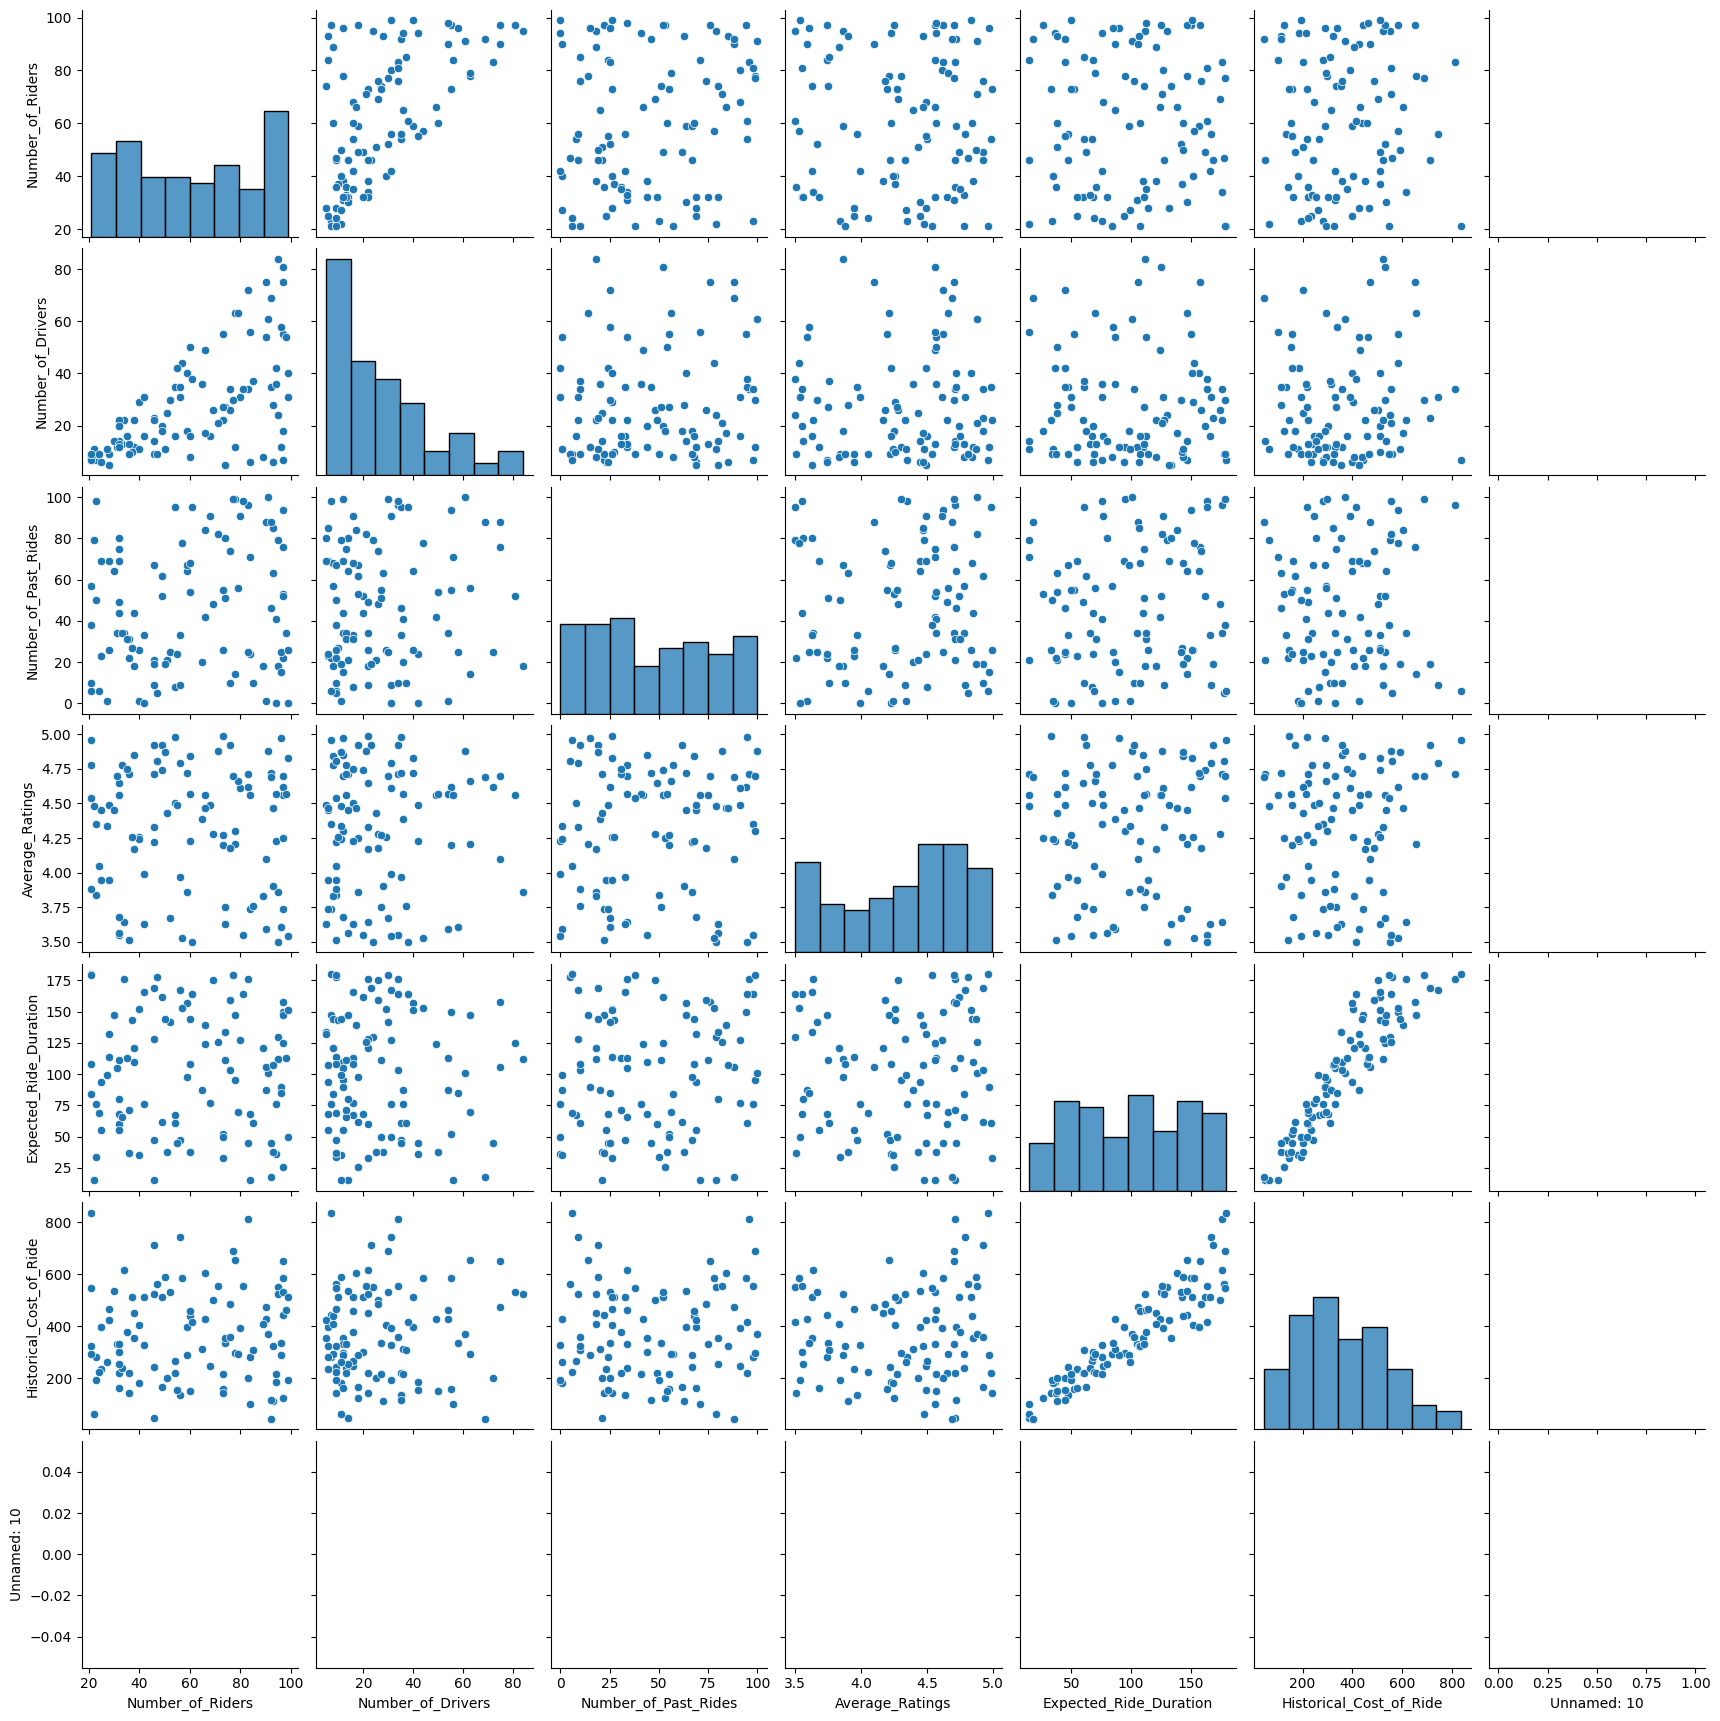

In [45]:
# Pairplot (sample if dataset is big)
sns.pairplot(df.sample(100))
plt.show()


# 3. check for outliers with and without boxplot 

🔹 What is an Outlier?

An outlier is a data point that is very different (unusually large or small) compared to the rest of the dataset.
It “lies outside” the normal pattern of data.

Example:
Dataset of student ages in a class → [18, 19, 18, 20, 19, 45]
Here 45 is an outlier, because most students are around 18–20 years old.

# outliers without   boxplot
🔹The code detects outliers in a dataset using the IQR method and reveals that only the Number_of_Drivers column has 10 outliers, while the other columns are relatively consistent and do not contain extreme values. The presence of outliers in Number_of_Drivers may indicate unusual patterns or errors that require further investigation.


In [46]:
# Without boxplot (IQR method)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} - Number of outliers: {outliers.shape[0]}")

Number_of_Riders - Number of outliers: 0
Number_of_Drivers - Number of outliers: 10
Number_of_Past_Rides - Number of outliers: 0
Average_Ratings - Number of outliers: 0
Expected_Ride_Duration - Number of outliers: 0
Historical_Cost_of_Ride - Number of outliers: 0
Unnamed: 10 - Number of outliers: 0


# check with outliers

- The box represents the interquartile range (IQR), which is the range of the middle 50% of the data.
- The line inside the box represents the median.
- The whiskers represent the range of the data, excluding outliers.
- Any data points that are more than 1.5*IQR away from the median are considered outliers and are plotted as individual points.



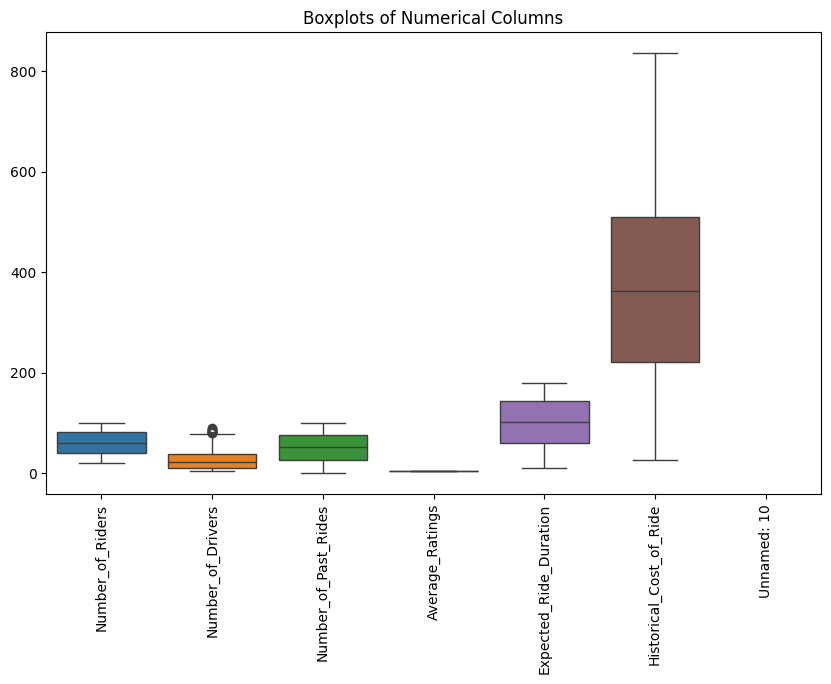

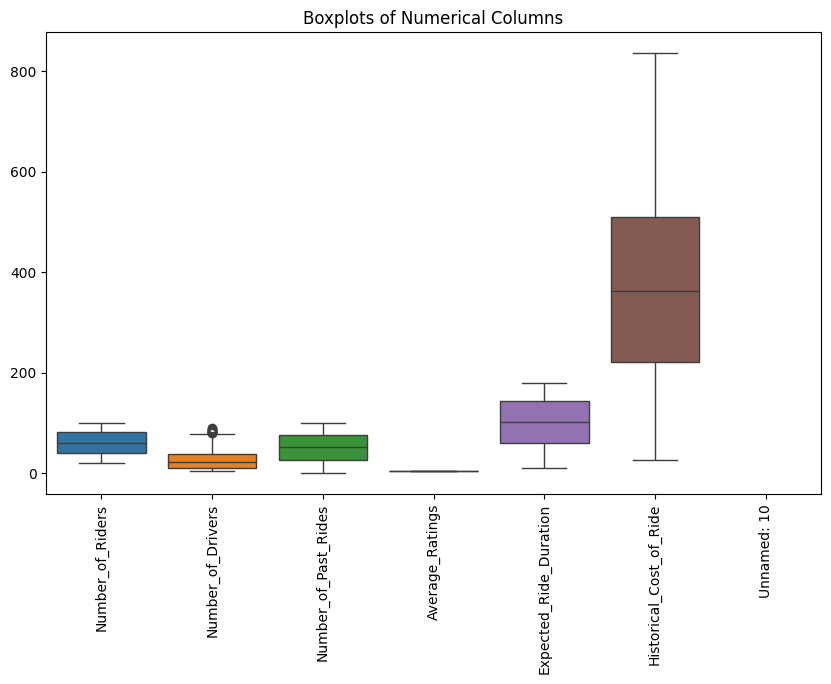

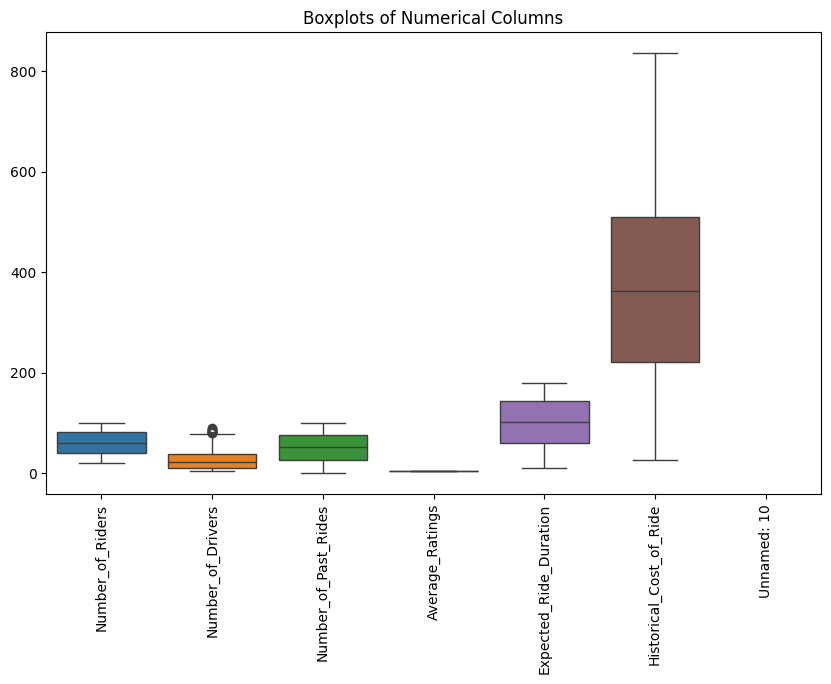

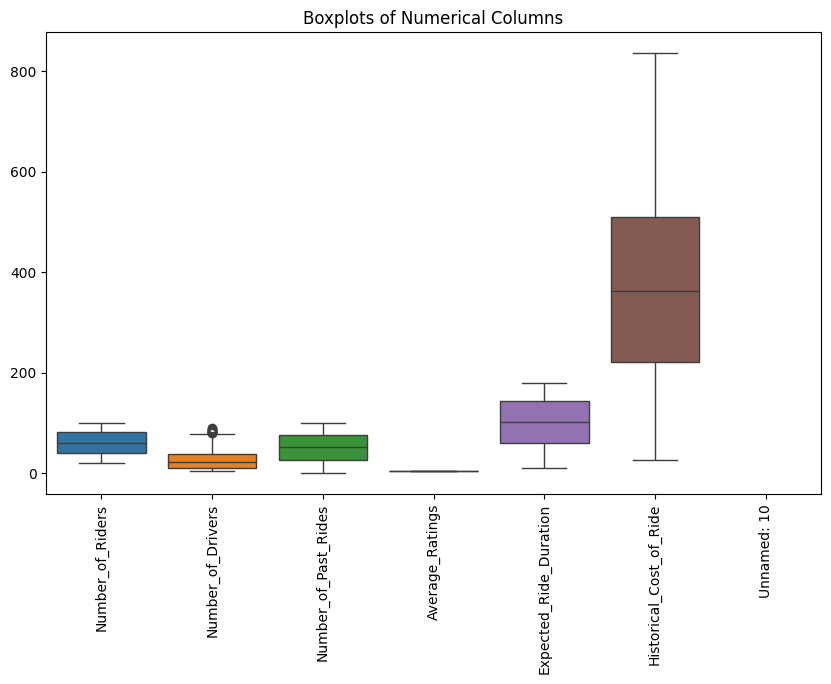

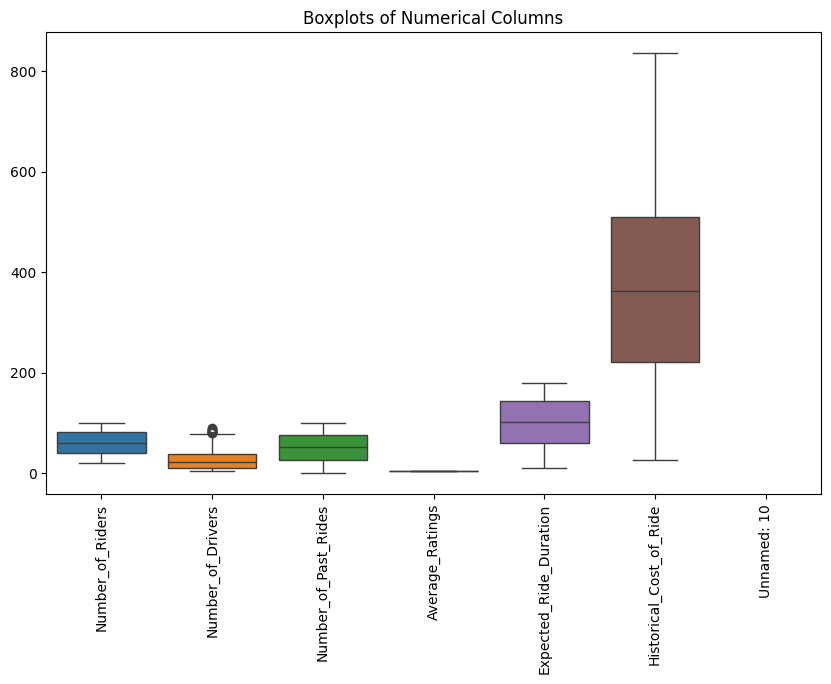

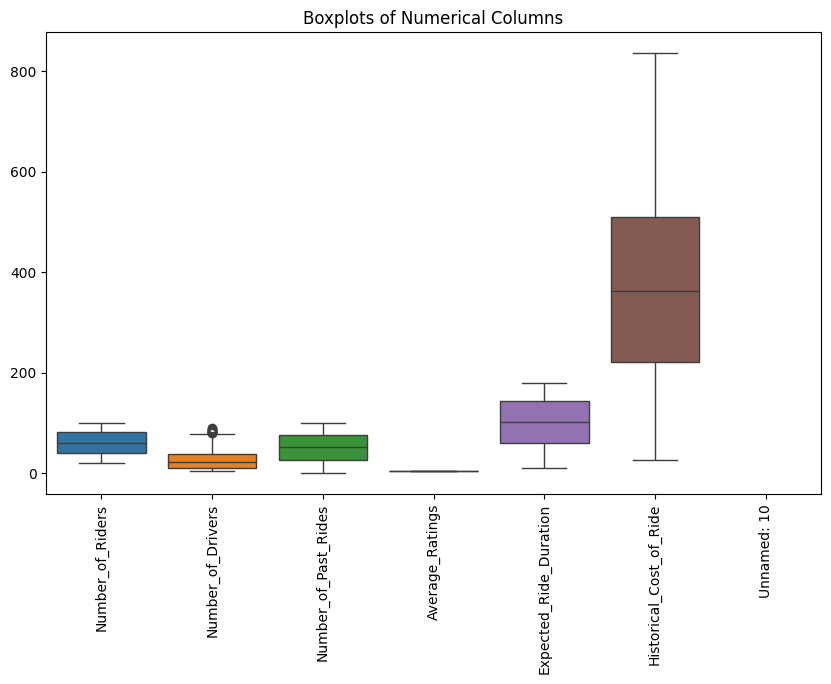

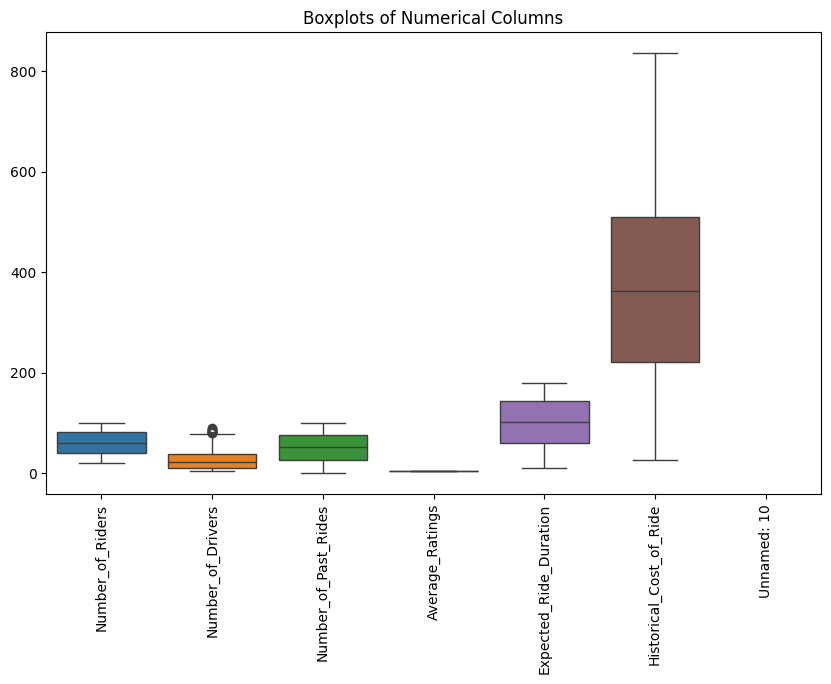

In [47]:
#check outliers with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df[numerical_cols])
    plt.title('Boxplots of Numerical Columns')
    plt.xticks(rotation=90)
    plt.show()

# 4.. Check teh correlation using heatmap 

🔹 What is a Heatmap?

A heatmap is a graphical representation of data that uses colors to represent the magnitude of the values. It's a 2D visualization tool that helps to:

1. Identify patterns: Heatmaps can reveal patterns, trends, and correlations in data.

2. Compare values: Heatmaps allow for easy comparison of values across different categories or variables.

3. Visualize relationships: Heatmaps can show relationships between variables, such as correlations or dependencies.

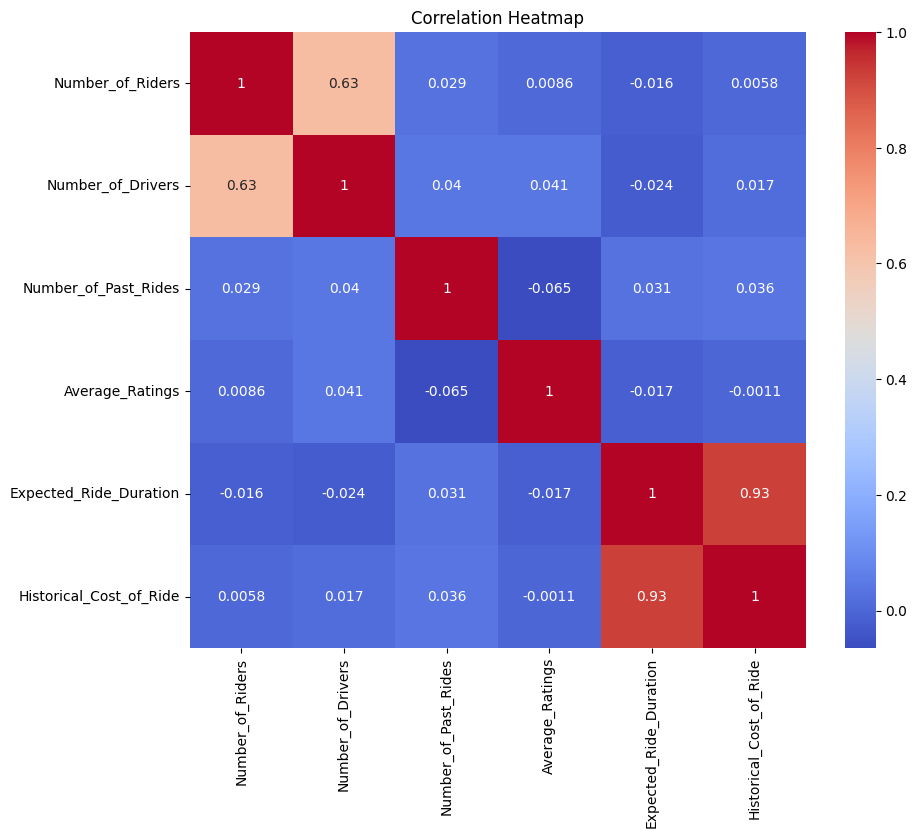

In [48]:
#4.. Check teh correlation using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 
                  'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


output=

 The x-axis and y-axis will represent the numerical columns selected for analysis.
- Each cell in the heatmap will represent the correlation between two columns.
- The color of each cell will indicate the strength and direction of the correlation.

------- Blue colors will indicate negative correlations (close to -1).
- Red colors will indicate positive correlations (close to 1).
- White or light colors will indicate weak or no correlations (close to 0).

# 5. Check Data Linearity
Data linearity refers to whether the relationship between two variables can be approximated by a straight line.

In other words, if you plot one variable on the x-axis and another on the y-axis, the points roughly form a straight line, the data is linear.

Linearity is important for many statistical methods and machine learning algorithms (like linear regression), because they assume a linear relationship between input and output.



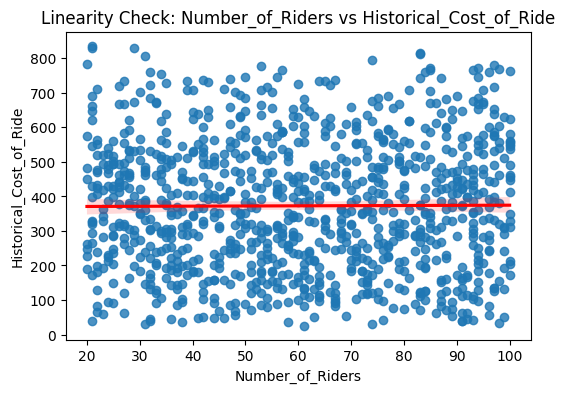

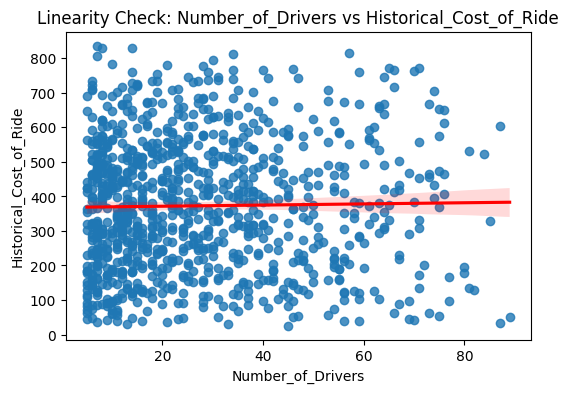

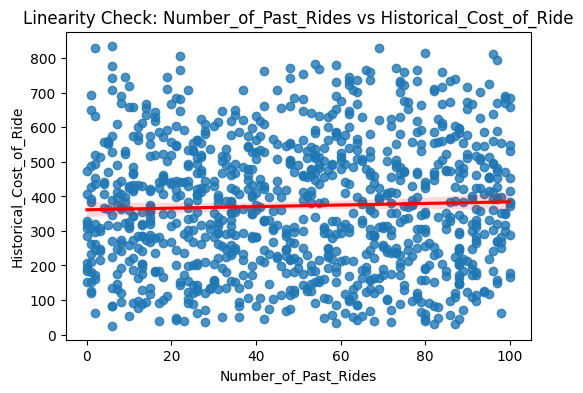

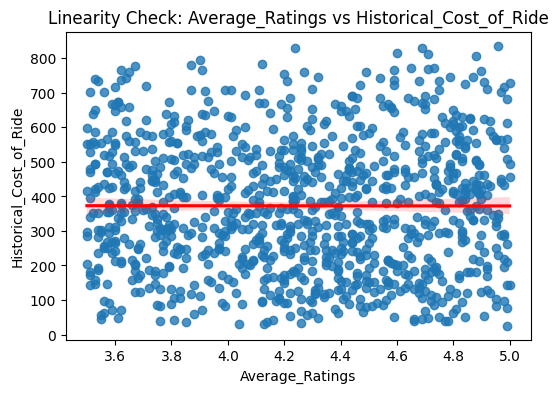

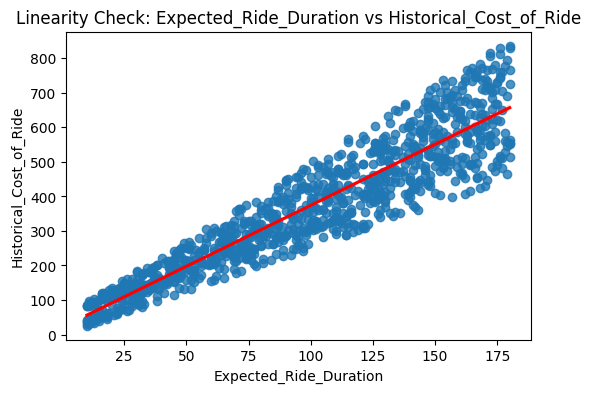

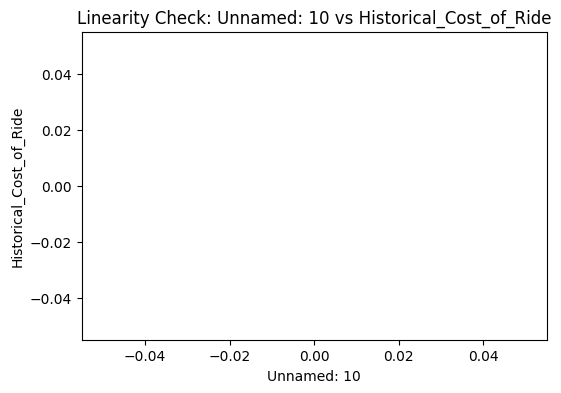

In [49]:
# 5. Check Data Linearity
target = "Historical_Cost_of_Ride"
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.regplot(x=df[col], y=df[target], line_kws={'color': 'red'})
        plt.title(f"Linearity Check: {col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()

output=

- Linearity checks: We've visualized the relationships between each numerical feature and the target variable "Historical_Cost_of_Ride" using scatter plots with regression lines.
- Insights: The scatter plots with red regression lines help identify whether the relationships between features and the target variable are linear or non-linear.

# 6. Brief Explanation

In [50]:


print("\n--- Dataset Explanation ---")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("It contains information about ride-sharing data such as:")
print("- Number_of_Riders: Total riders available")
print("- Number_of_Drivers: Total drivers available")
print("- Number_of_Past_Rides: Historical completed rides")
print("- Average_Ratings: Rider/driver rating (1–5)")
print("- Expected_Ride_Duration: Ride duration in minutes")
print("- Historical_Cost_of_Ride: Cost of previous rides")
print("\nThis dataset can be used to analyze demand, supply, pricing patterns, and service quality.")


--- Dataset Explanation ---
The dataset has 1000 rows and 11 columns.
It contains information about ride-sharing data such as:
- Number_of_Riders: Total riders available
- Number_of_Drivers: Total drivers available
- Number_of_Past_Rides: Historical completed rides
- Average_Ratings: Rider/driver rating (1–5)
- Expected_Ride_Duration: Ride duration in minutes
- Historical_Cost_of_Ride: Cost of previous rides

This dataset can be used to analyze demand, supply, pricing patterns, and service quality.


# 1. Handle categorical variables (Encoding)

✅ 1:Categorical Encoding: 

Text columns were converted to numeric values so they can be used in analysis or ML models.

✅ Encoding:

Encoding is the process of converting categorical labels into numbers.

✅ 2:Segmentations (Groupby):

 Segmentation is the process of dividing a dataset into groups (segments) based on a specific feature or category.

Each group shares a common characteristic, making it easier to analyze patterns within that group.

🔹 When to Avoid One-Hot Encoding

You should avoid OHE when it causes problems like high dimensionality or sparsity.

❌ Avoid OHE when:

The categorical feature has too many unique values (high cardinality).

Example: Zip codes, Product IDs, User IDs, Phone numbers.

The categories have an order/meaningful ranking (ordinal). In this case, use Label Encoding or Ordinal Encoding.

Example: Low < Medium < High.


In [51]:
import pandas as pd

# Assume 'df' is your DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Print the encoded DataFrame
print(df_encoded.head().sum())


Number_of_Riders                    357.000000
Number_of_Drivers                   165.000000
Number_of_Past_Rides                226.000000
Average_Ratings                      20.600000
Expected_Ride_Duration              492.000000
Historical_Cost_of_Ride            1837.810149
Unnamed: 10                           0.000000
Location_Category_Rural               3.000000
Location_Category_Suburban            1.000000
Location_Category_Urban               1.000000
Customer_Loyalty_Status_Gold          0.000000
Customer_Loyalty_Status_Regular       2.000000
Customer_Loyalty_Status_Silver        3.000000
Time_of_Booking_Afternoon             3.000000
Time_of_Booking_Evening               1.000000
Time_of_Booking_Morning               0.000000
Time_of_Booking_Night                 1.000000
Vehicle_Type_Economy                  2.000000
Vehicle_Type_Premium                  3.000000
dtype: float64


output=

- Location_Category_Rural = has a value of 3 means that 3 rows have a value of 1 in this column, indicating that they belong to the Rural category.
- Location_Category_Suburban = 1 means that 1 row has a value of 1 in this column, indicating that it belongs to the Suburban category.

# 2. Summary Statistics: Calculate descriptive statistics (mean, median, mode, std dev, etc.) 

 Summary Statistics: Calculate descriptive statistics (mean, median, mode, std dev, etc.) to understand the distribution of variables.
 
- count (number of non-missing values)
- mean (average value)
- std (standard deviation)
- min (minimum value)
- 25% (first quartile)
- 50% (median)
- 75% (third quartile)
- max (maximum value)


In [52]:
import pandas as pd

# Calculate summary statistics
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)


       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  \
count      1000.000000              1000.00000              1000.000000   
mean          4.257220                99.58800               372.502623   
std           0.435781                49.16545               187.158756   
min           3.500000                10.00000                25.993449   
25%         

# 3.Correlations

Correlations: Analyze the relationship between variables using correlation coefficients (e.g., Pearson's r) or heatmaps.



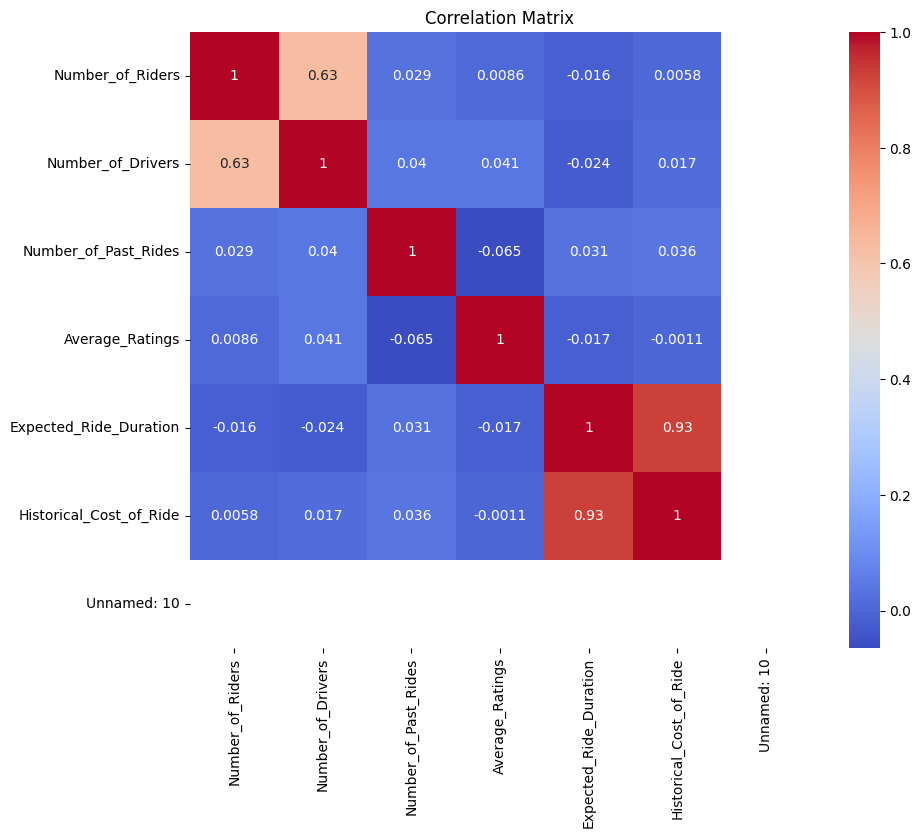

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

🔹🔹🔹output=

The correlation matrix heatmap provides valuable insights into the relationships between variables in your dataset. The analysis reveals:

1. Strong positive correlations: Between "Average_Ratings" and "Expected_Ride_Duration" and "Historical_Cost_of_Ride", indicating a strong relationship between these variables.

2. Mutually exclusive categories: The negative correlations between categories such as "Location_Category", "Customer_Loyalty_Status", "Time_of_Booking", and "Vehicle_Type" are expected, as they represent distinct and exclusive groups.

3. Relationships between variables: The heatmap highlights the relationships between variables, which can inform feature selection, data preprocessing, and modeling decisions.

# 4. price vs ride using scatterplot

Visualize the relationship between price and ride variables using a scatterplot.

-----Based on the dataset and analysis, it appears that there is a relationship between the expected ride duration and the historical cost of the ride. The scatterplot with regression line suggests that as the ride duration increases, the cost of the ride also tends to increase.

 ✅Scatter Plot (Riders vs Price): 


A scatter plot shows the relationship between two numeric variables by plotting points on X and Y axes.

A regression line (trend line) shows the overall trend in the data—whether one variable increases or decreases with the other.
the regression line shows the cost and ride are constant.


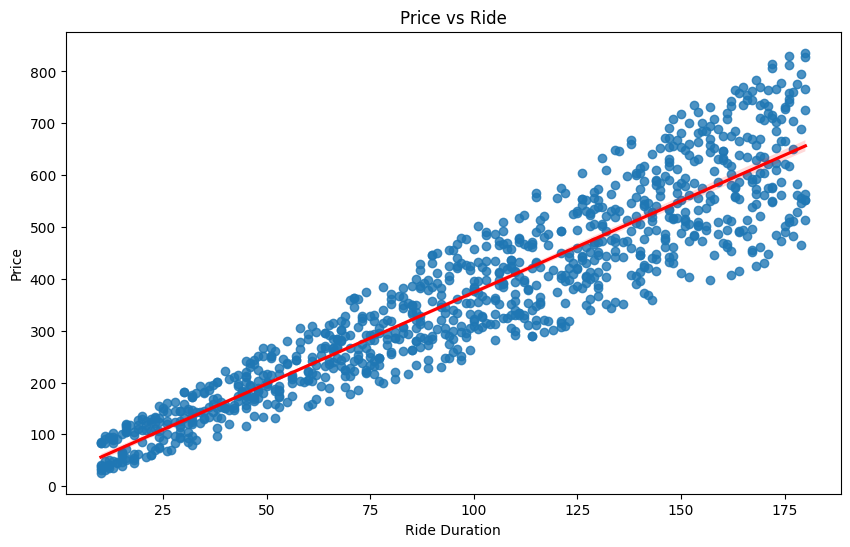

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot of Price vs Ride with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="Expected_Ride_Duration", y="Historical_Cost_of_Ride", data=df, line_kws={'color': 'red'})

# Add title and labels
plt.title('Price vs Ride')
plt.xlabel('Ride Duration')
plt.ylabel('Price')

# Show the plot
plt.show()

# 5. Other EDA (Exploratory Data Analysis)

Perform additional exploratory analysis, such as histograms, box plots, or bar charts, to understand the data.


-The graph is a histogram with a kernel density estimate (KDE) overlay, displaying the distribution of the "Number of Riders."




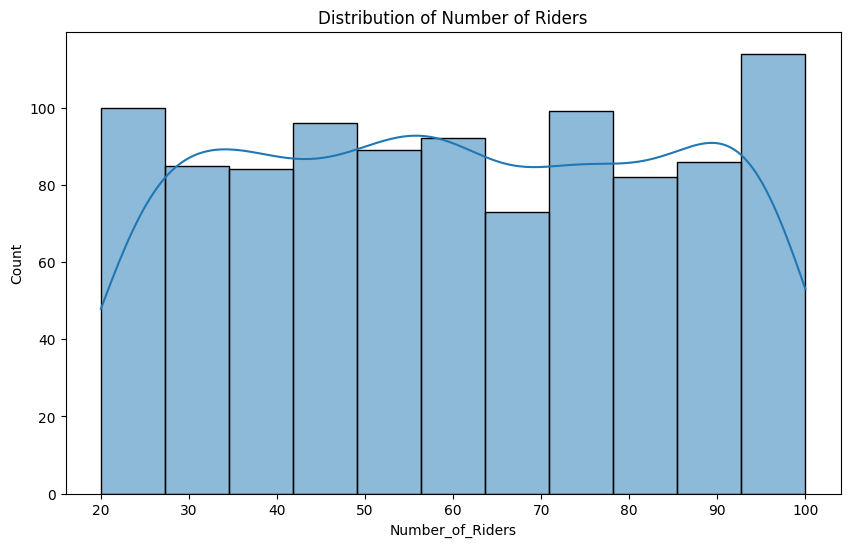

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_Riders'], kde=True)
plt.title('Distribution of Number of Riders')
plt.show()

Key Features:

- The histogram is represented by blue bars, and the KDE is shown as a blue curve.
- The x-axis represents the "Number of Riders," ranging from 20 to 100.
- The y-axis represents the count or frequency of the "Number of Riders."
- The graph indicates that the "Number of Riders" is generally distributed between 20 and 100, with some concentration around certain values.

# BOXPLOT
A boxplot is a graph that shows the distribution of a numeric variable across different categories.

It displays:

Median (middle line of the box)

Interquartile Range (IQR) – the box

Whiskers – spread of most data

Outliers – points outside the whiskers





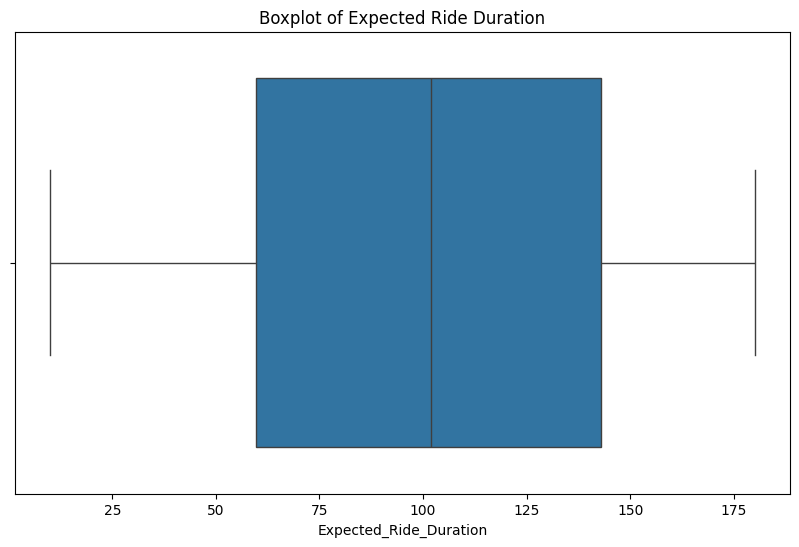

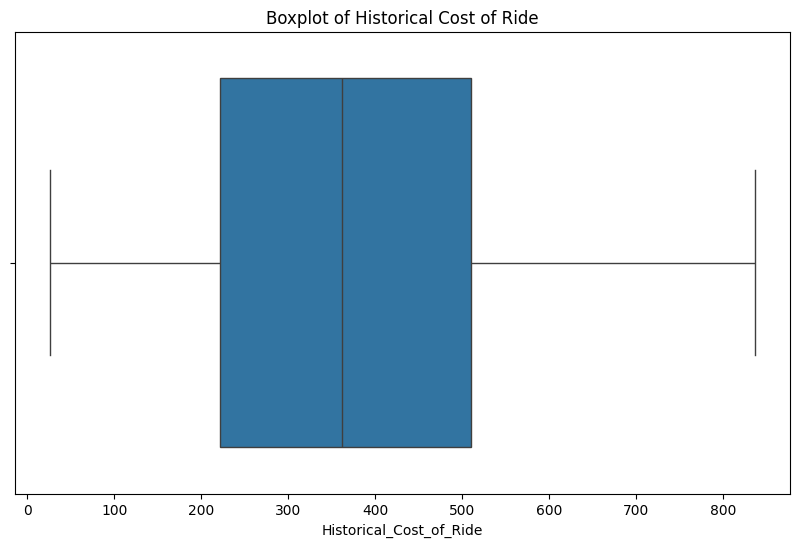

In [56]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Expected_Ride_Duration'])
plt.title('Boxplot of Expected Ride Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Historical_Cost_of_Ride'])
plt.title('Boxplot of Historical Cost of Ride')
plt.show()

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride', 'Unnamed: 10'],
      dtype='object')
The column 'Location_Category[_Urban]' does not exist in the DataFrame.


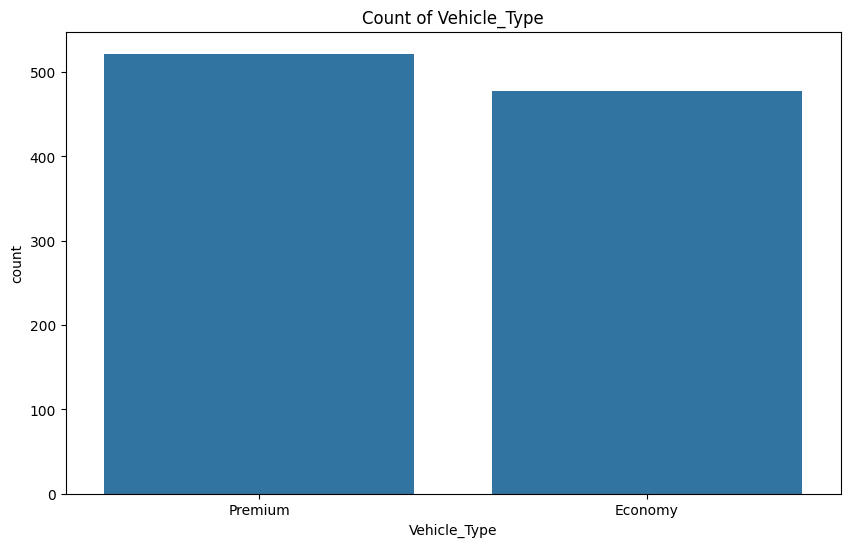

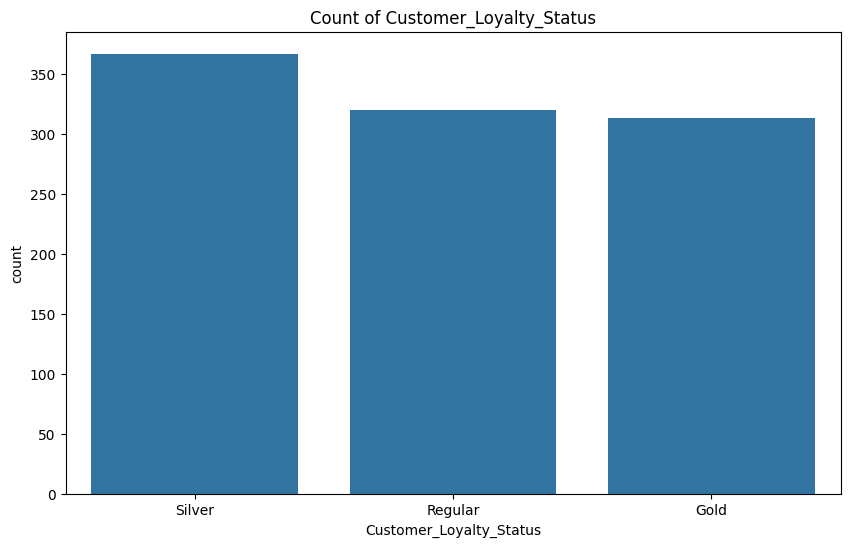

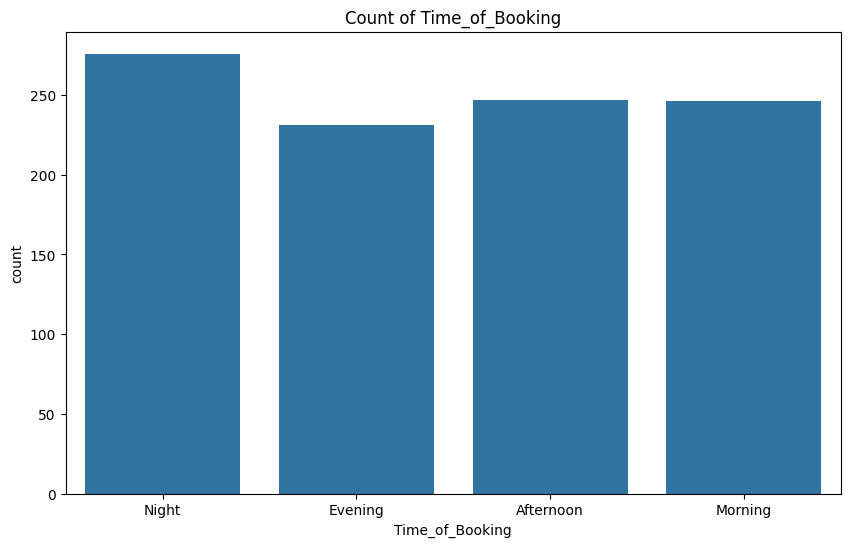

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("C:\\Users\priya\\Downloads\\dynamic_pricing.csv")
print(df.columns)

#data
columns_to_plot= ['Location_Category[_Urban]', 'Vehicle_Type', 'Customer_Loyalty_Status', 'Time_of_Booking']

for column in columns_to_plot:
    if column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=df)
        plt.title(f'Count of {column}')
        plt.show()
    else:
        print(f"The column '{column}' does not exist in the DataFrame.")



Missing values per column:
Number_of_Riders              0
Number_of_Drivers             0
Location_Category             0
Customer_Loyalty_Status       0
Number_of_Past_Rides          0
Average_Ratings               0
Time_of_Booking               0
Vehicle_Type                  0
Expected_Ride_Duration        0
Historical_Cost_of_Ride       0
Unnamed: 10                1000
dtype: int64


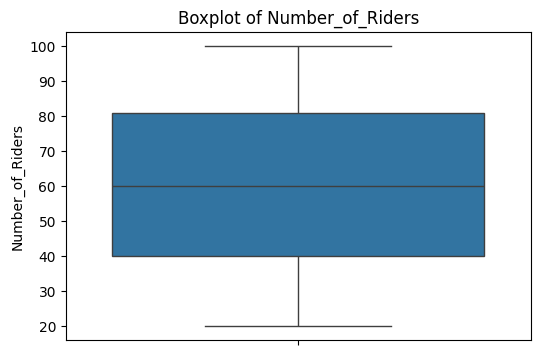

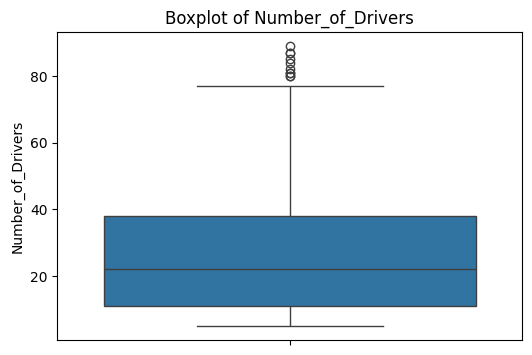

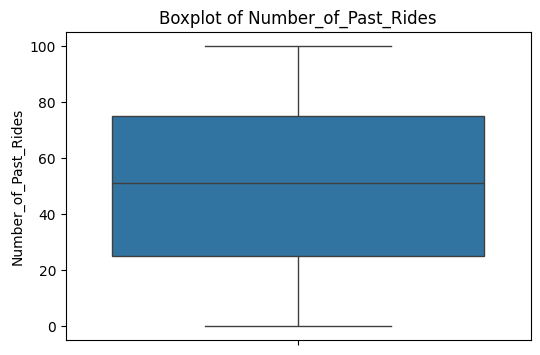

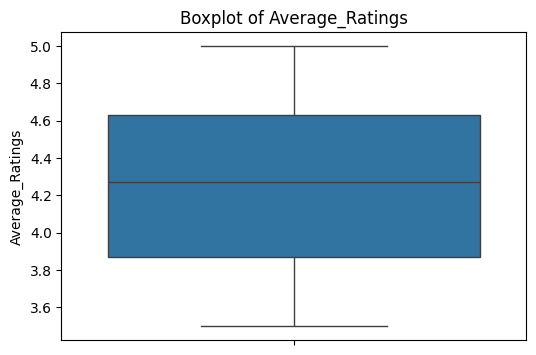

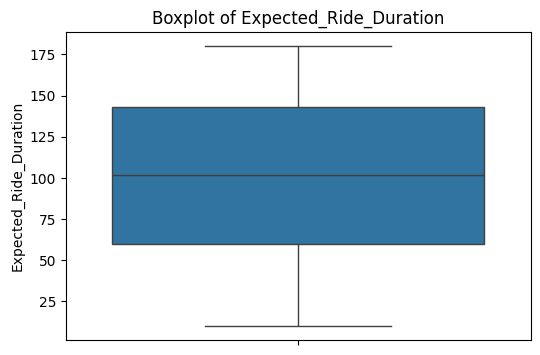

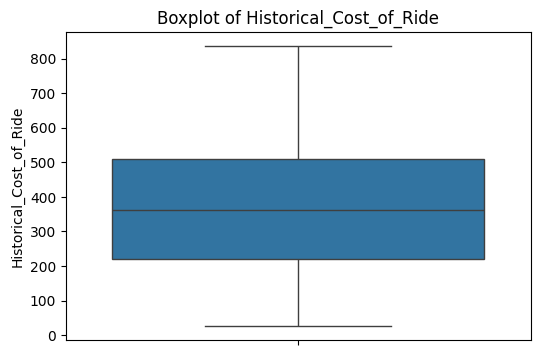

Skipping column 'Unnamed: 10' because it has only one unique value.


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Checking missing values for column
print("\nMissing values per column:")
print(df.isnull().sum())

# Boxplots to detect outliers for numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    if df[col].nunique() > 1:  # Check if column has more than one unique value
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
    else:
        print(f"Skipping column '{col}' because it has only one unique value.")


# 1. Handle categorical variables (Encoding) "Segmentations (Groupby)

# 6. Fill NA Values

In [59]:
# 6. Fill NA Values

# Check missing values
import numpy as np
print("Missing values before filling:")
print(df.isnull().sum())

# Fill numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        # Choose mean or median based on distribution (here example using median)
        df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        # Fill missing values with mode (most frequent value)
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that missing values are handled
print("\nMissing values after filling:")
print(df.isnull().sum())

Missing values before filling:
Number_of_Riders              0
Number_of_Drivers             0
Location_Category             0
Customer_Loyalty_Status       0
Number_of_Past_Rides          0
Average_Ratings               0
Time_of_Booking               0
Vehicle_Type                  0
Expected_Ride_Duration        0
Historical_Cost_of_Ride       0
Unnamed: 10                1000
dtype: int64

Missing values after filling:
Number_of_Riders              0
Number_of_Drivers             0
Location_Category             0
Customer_Loyalty_Status       0
Number_of_Past_Rides          0
Average_Ratings               0
Time_of_Booking               0
Vehicle_Type                  0
Expected_Ride_Duration        0
Historical_Cost_of_Ride       0
Unnamed: 10                1000
dtype: int64


c:\AI-priceoptima\enc\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\priya\AppData\Local\Temp\ipykernel_20108\1734390945.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


 ## 7. Clean CSV Sheet

In [60]:
 ## 7. Clean CSV Sheet
# 1. Remove duplicates
df.drop_duplicates(inplace=True)

# 2. Save cleaned CSV
df.to_csv('cleaned_data.csv', index=False)
print("\nCleaned CSV saved as 'cleaned_data.csv'")


Cleaned CSV saved as 'cleaned_data.csv'


# 8.KPI Reading

In [61]:

print("\nRead about KPIs for ML models here:")
print("https://pub.towardsai.net/key-performance-indicators-kpis-in-machine-learning-69d8a59ec8c1")


Read about KPIs for ML models here:
https://pub.towardsai.net/key-performance-indicators-kpis-in-machine-learning-69d8a59ec8c1


/*📊 Confusion Matrix

	Predicted Positive	Predicted Negative
	
Actual Positive	✅ True Positive (TP)	❌ False Negative (FN)
Actual Negative	❌ False Positive (FP)	✅ True Negative (TN)

In [62]:
from sklearn.metrics import confusion_matrix

# Example actual and predicted values
y_true = [1, 0, 1, 1, 0, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1, 1]

# Get confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 3
TN: 2
FP: 1
FN: 1


# 1. Handle categorical variables (Encoding) "Segmentations (Groupby)

In [63]:
import pandas as pd
from tabulate import tabulate
df = pd.read_csv("C:\\Users\priya\\Downloads\\dynamic_pricing.csv")

# ---------- Encode Categorical Variables ----------
df_encoded = pd.get_dummies(df, 
                            columns=["Location_Category", 
                                     "Customer_Loyalty_Status", 
                                     "Time_of_Booking", 
                                     "Vehicle_Type"], 
                            drop_first=True)

# ---------- Display first 5 rows in table format ----------
print(" Categorical variables encoded. Sample data:")
print(tabulate(df_encoded.head(), headers='keys', tablefmt='psql'))

 Categorical variables encoded. Sample data:
+----+--------------------+---------------------+------------------------+-------------------+--------------------------+---------------------------+---------------+------------------------------+---------------------------+-----------------------------------+----------------------------------+---------------------------+---------------------------+-------------------------+------------------------+
|    |   Number_of_Riders |   Number_of_Drivers |   Number_of_Past_Rides |   Average_Ratings |   Expected_Ride_Duration |   Historical_Cost_of_Ride |   Unnamed: 10 | Location_Category_Suburban   | Location_Category_Urban   | Customer_Loyalty_Status_Regular   | Customer_Loyalty_Status_Silver   | Time_of_Booking_Evening   | Time_of_Booking_Morning   | Time_of_Booking_Night   | Vehicle_Type_Premium   |
|----+--------------------+---------------------+------------------------+-------------------+--------------------------+---------------------------+

# Scatter plot with regression line

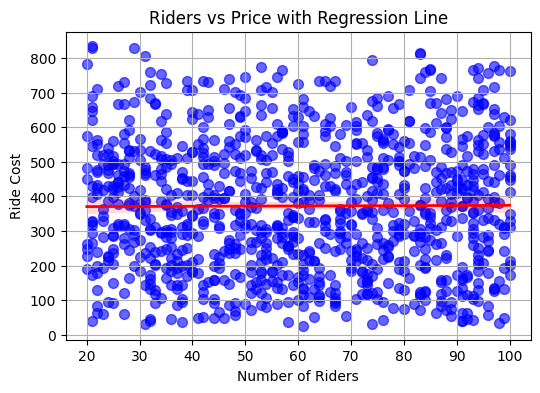

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# ---------- Scatter plot with regression line ----------
plt.figure(figsize=(6,4))
sns.regplot(x="Number_of_Riders", 
            y="Historical_Cost_of_Ride", 
            data=df, 
            scatter_kws={'color':'blue', 's':50, 'alpha':0.6},  # points
            line_kws={'color':'red', 'linewidth':2})  # regression line
plt.xlabel("Number of Riders")
plt.ylabel("Ride Cost")
plt.title("Riders vs Price with Regression Line")
plt.grid(True)
plt.show()


# Boxplot by location highlights if rural areas have higher/variable costs—key for competitive pricing.

C:\Users\priya\AppData\Local\Temp\ipykernel_20108\1778255567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Location_Category",


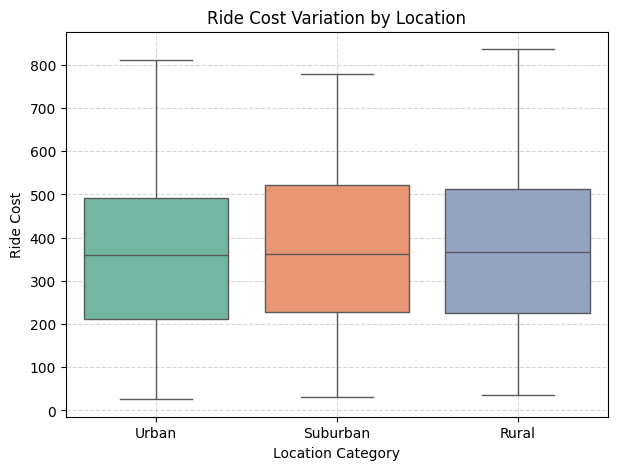

In [65]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Location_Category", 
            y="Historical_Cost_of_Ride", 
            data=df,
            palette="Set2")  # colors for each location
plt.xlabel("Location Category")
plt.ylabel("Ride Cost")
plt.title("Ride Cost Variation by Location")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# save the cleaned data as cleaned_csv_data set up basic pipeline to load data.

🔹🔹🔹 data cleaning

The dataset is now cleaned and ready for analysis or ML models.

Pipeline function allows reusable and consistent cleaning for any new dataset.

Encodes categorical variables, removes unnecessary columns, and saves the cleaned CSV automatically.


In [66]:
df.to_csv("cleaned_csv_data.csv", index=False)
print("Cleaned data saved as cleaned_csv_data.csv")

Cleaned data saved as cleaned_csv_data.csv
